# Vector autoregression modeling

Task 1. make sure statsmodel VAR example works in python 3 environment

[python statsmodel package documentation](http://www.statsmodels.org/dev/vector_ar.html)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 20, Jul, 2017
Time:                     13:33:18
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.5830
Nobs:                     200.000    HQIC:                  -27.7892
Log likelihood:           1962.57    FPE:                7.42129e-13
AIC:                     -27.9293    Det(Omega_mle):     6.69358e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.001527         0.001119            1.365           0.174
L1.realgdp         -0.279435         0.169663           -1.647           0.101
L1.realcons         0.675016         0.131285            5.142    

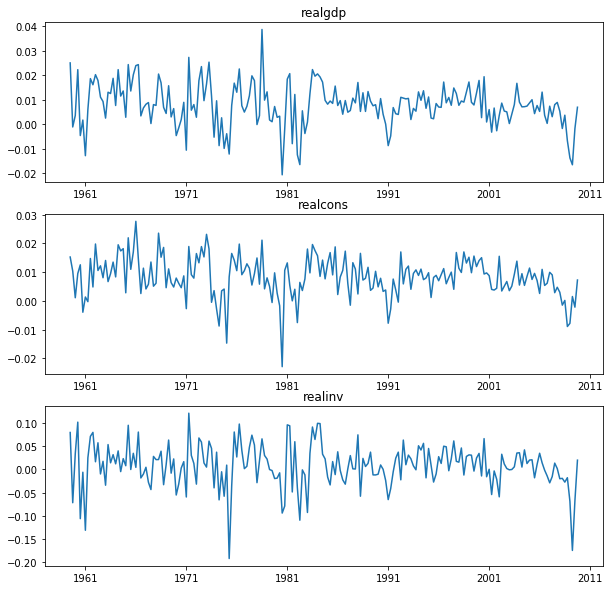

In [15]:
%reset -f
%matplotlib inline

import numpy as np
import pandas
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR

mdata = sm.datasets.macrodata.load_pandas().data
dates = mdata[['year', 'quarter']].astype(int).astype(str)
quarterly = dates["year"] + "Q" + dates["quarter"]
from statsmodels.tsa.base.datetools import dates_from_str
quarterly = dates_from_str(quarterly)
mdata = mdata[['realgdp','realcons','realinv']]
mdata.index = pandas.DatetimeIndex(quarterly)
data = np.log(mdata).diff().dropna()
model = VAR(data)
results = model.fit(2)
print(results.summary())

results.plot()